In [ ]:
### import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split, ShuffleSplit, learning_curve, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, classification_report, roc_auc_score, make_scorer, precision_recall_curve, average_precision_score 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#from sklearn.ensemble import RandomForestClassifier, IslationForest, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
%matplotlib inline
from sklearn.metrics import roc_curve, auc , f1_score
from sklearn.metrics import confusion_matrix
plt.style.use('ggplot')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
target = pd.read_csv("drive/MyDrive/self/Train-1542865627584.csv")
beneficiary = pd.read_csv("drive/MyDrive/self/Train_Beneficiarydata-1542865627584.csv")
in_pt = pd.read_csv("drive/MyDrive/self/Train_Inpatientdata-1542865627584.csv")
out_pt = pd.read_csv("drive/MyDrive/self/Train_Outpatientdata-1542865627584.csv")
 

In [ ]:
in_pt.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
out_pt.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
beneficiary.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
target.shape

(5410, 2)

# Explotery data analysis

In [ ]:
beneficiary .head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
#https://rohansoni-jssaten2019.medium.com/healthcare-provider-fraud-detection-and-analysis-machine-learning-6af6366caff2
# Merge in_pt, out_pt and ben df into a single patient dataset
merged_data = pd.merge(in_pt, out_pt,left_on = [ idx for idx in out_pt.columns if idx in in_pt.columns],
                        right_on = [ idx for idx in out_pt.columns if idx in in_pt.columns],
                        how = 'outer').\
              merge(beneficiary,left_on='BeneID',right_on='BeneID',how='inner')

In [ ]:
merged_data.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCon

In [ ]:
merged_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320
4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1914-03-01,NaN,2,2,0,1,360,12,12,2,1,1,2,2,1,1,2,2,1,1,5000,1068,250,320


# Explotery data analysis

In [ ]:
def univariategraph(lst1,lst2,lst3,ylabel,xlabel):
    #https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
    labels = lst3
    fraudno = lst2
    fraudyes = lst1

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2,fraudno , width, label='NO fraud')
    rects2 = ax.bar(x + width/2,fraudyes , width, label='yes fraud')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    #ax.set_title('patients vs  doctor')
    ax.set_xlabel(xlabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


In [ ]:
def barplotmake(variable,yaxis,xaxis):
    Train_fyes = fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'Yes')]
    fraudyes=Train_fyes[variable].value_counts()
   # df = pd.DataFrame()
    fraudyes = fraudyes.to_frame()
    fraudyes['count']=fraudyes[variable]
    fraudyes['number'] = fraudyes.index
    fraudyes=fraudyes.drop([variable],axis=1)
    Train_fno = fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'No')]
    fraudno=Train_fno[variable].value_counts()
    fraudno = fraudno.to_frame()
    fraudno['count']=fraudno[variable]
    fraudno['number'] =fraudno.index
    fraudno=fraudno.drop([variable],axis=1)
    lst1=fraudyes['count']
    lst2=fraudno['count']
    lst3=fraudno['number']
    univariategraph(lst1,lst2,lst3,yaxis,xaxis)

In [ ]:
#Train_fno =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
#Train_fno = target.loc[(target['PotentialFraud'] == 'No')]
#fraud_provider_ip_dfno = pd.merge(merged_data, Train_fno, how='inner', on='Provider')
fraud_provider_ip_df = pd.merge(merged_data,target, how='inner', on='Provider')


fraud_provider_ip_df['AttendingPhysician']= fraud_provider_ip_df['AttendingPhysician'].replace(np.nan,0, regex=True)
fraud_provider_ip_df['OperatingPhysician']= fraud_provider_ip_df['OperatingPhysician'].replace(np.nan,0, regex=True)
fraud_provider_ip_df['OtherPhysician'] = fraud_provider_ip_df['OtherPhysician'].replace(np.nan, 0, regex=True)
fraud_provider_ip_df['numberofdoctor'] = fraud_provider_ip_df[["AttendingPhysician","OperatingPhysician","OtherPhysician"]].apply(lambda x:x.unique().tolist(), axis=1)


In [ ]:
for sentance in (fraud_provider_ip_df['numberofdoctor'].values):
        for i in sentance:
            if i==0:
                sentance.remove(0)

In [ ]:
fraud_provider_ip_df['uniquenumberofdoctor'] = fraud_provider_ip_df["numberofdoctor"].str.len()

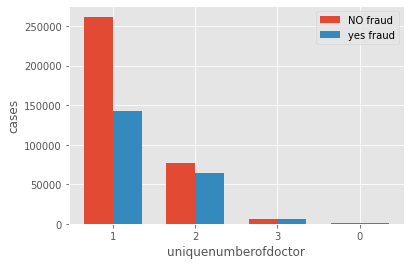

In [ ]:
barplotmake('uniquenumberofdoctor','cases','uniquenumberofdoctor')

Here we take each patient who are attended by how many number of doctor here.As we see in the dataset that same doctor present for one patient in multiple role like operating physian,attending physian etc.So we take for each patient how many unique number of doctor is present. We can see that the provider who's patients are victim of  the fraud they are mostly attended by one number of doctor.

# Fraud State

In [ ]:
Train_fyes = fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'Yes')]
fraudyes=Train_fyes['State'].value_counts()
fraudyes = fraudyes.to_frame()
fraudyes['count']=fraudyes['State']
fraudyes['number'] = fraudyes.index
fraudyes=fraudyes.drop(['State'],axis=1)
lst1=fraudyes['count']
lst3=fraudyes['number']
statelabels = lst3
fraudyes = lst1

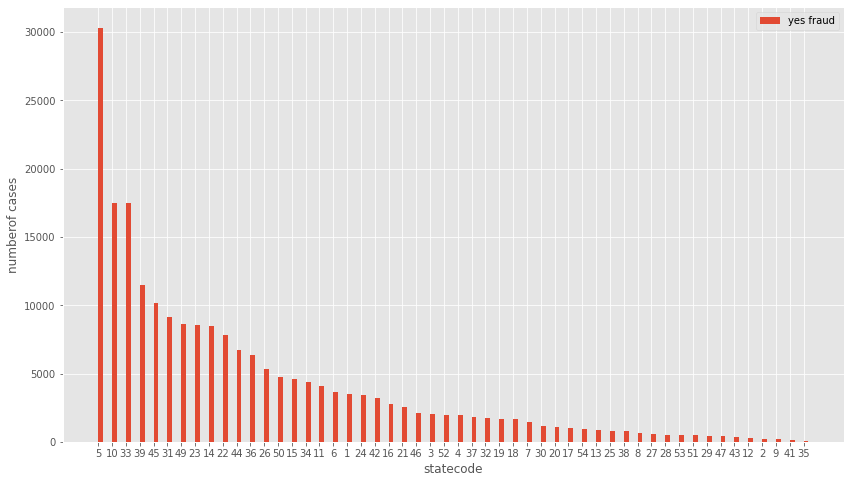

In [ ]:
x = np.arange(len(statelabels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize =(14, 8))
rects2 = ax.bar(x + width/2,fraudyes , width, label='yes fraud')
ax.set_xticks(x)
ax.set_xticklabels(statelabels)
ax.set_ylabel('numberof cases')
#ax.set_title('patients vs  doctor')
ax.set_xlabel('statecode')
ax.legend()

In [ ]:
statecode=statelabels[:15]
fraudstate=[]
for code in (fraud_provider_ip_df['State'].values):
    if code in statecode:
        fraudstate.append(1)
    else:
        fraudstate.append(0)
fraud_provider_ip_df['fraudstate']=fraudstate

# Fraud country

In [ ]:
Train_fyes = fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'Yes')]
fraudyes=Train_fyes['County'].value_counts()
fraudyes = fraudyes.to_frame()
fraudyes['count']=fraudyes['County']
fraudyes['number'] = fraudyes.index
fraudyes=fraudyes.drop(['County'],axis=1)
lst1=fraudyes['count']
lst3=fraudyes['number']
countrylabels = lst3[:20]
fraudyes = lst1[:20]

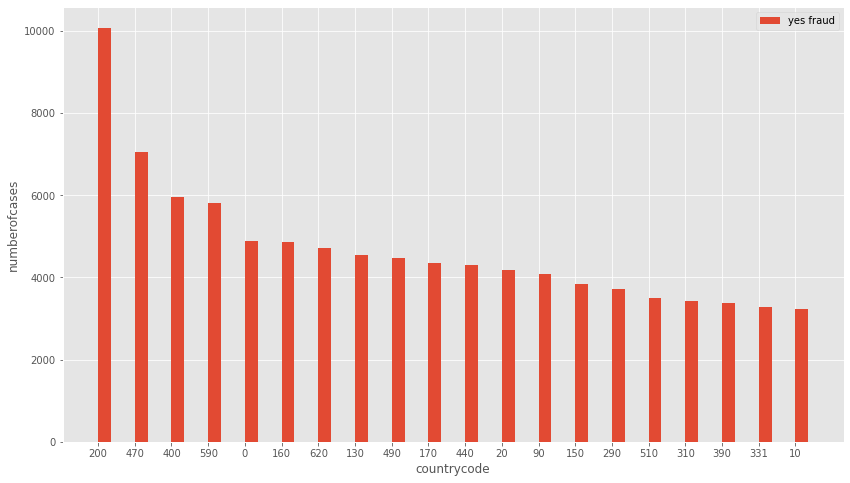

In [ ]:
x = np.arange(len(countrylabels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize =(14, 8))
rects2 = ax.bar(x + width/2,fraudyes , width, label='yes fraud' )
ax.set_xticks(x)
ax.set_ylabel('numberofcases')
#ax.set_title('patients vs  doctor')
ax.set_xlabel('countrycode')
ax.set_xticklabels(countrylabels)
ax.legend()

In [ ]:
countrycode=countrylabels[:15]
fraudcountry=[]
for code in (fraud_provider_ip_df['County'].values):
    if code in countrycode:
        fraudcountry.append(1)
    else:
        fraudcountry.append(0)
fraud_provider_ip_df['fraudcountry']=fraudcountry

# is admitted

In [ ]:
fraud_provider_ip_df['AdmissionDt'] = fraud_provider_ip_df['AdmissionDt'].replace(np.nan, 0)
def admission(df):
    lst=[]
    for i in (df):
        if i==0:
            lst.append(0)
        else:
            lst.append(1)
    return(lst)

In [ ]:
mn=admission(fraud_provider_ip_df['AdmissionDt'])
fraud_provider_ip_df['isadmitted']=mn

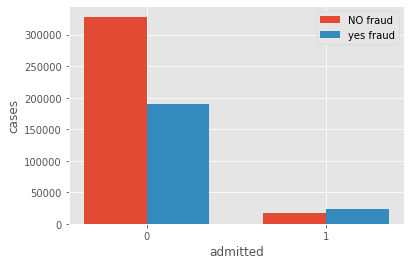

In [ ]:
barplotmake('isadmitted','cases','admitted')

Here we can see that who are victim  of fraud not admitted in the hospital zero means not admitted 1 means admitted

# is discharge

In [ ]:
fraud_provider_ip_df['DischargeDt'] = fraud_provider_ip_df['DischargeDt'].replace(np.nan, 0)


In [ ]:
mn1=admission(fraud_provider_ip_df['DischargeDt'])
fraud_provider_ip_df['isdischarge']=mn1

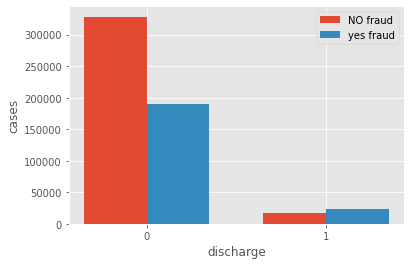

In [ ]:
barplotmake('isdischarge','cases','discharge')

# admitted days

In [ ]:
fraud_provider_ip_df['DischargeDt'] = pd.to_datetime(fraud_provider_ip_df['DischargeDt'] , format = '%Y-%m-%d')
fraud_provider_ip_df['AdmissionDt'] = pd.to_datetime(fraud_provider_ip_df['AdmissionDt'],format = '%Y-%m-%d',errors='ignore')

fraud_provider_ip_df['admitteddays'] = round(((fraud_provider_ip_df['DischargeDt'] -fraud_provider_ip_df['AdmissionDt']).dt.days))


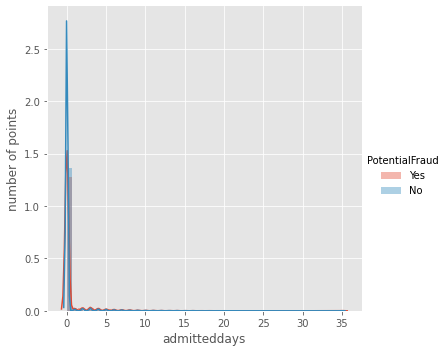

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.FacetGrid(fraud_provider_ip_df,hue='PotentialFraud',size=5)\
.map(sns.distplot,"admitteddays")\
.add_legend()
plt.ylabel('number of points')
plt.show()

Here we plot the pdf of admitted days of all patients.Who arevictim of fraud they stay in the hospiltal for shorter period of time than other people.

# Difference between Number of procedural code-Number of claim code

In [ ]:

fraud_provider_ip_df[[ 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10']] = np.where(fraud_provider_ip_df[[ 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10',]].isnull(), 0, 1)


fraud_provider_ip_df[['ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']] = np.where(fraud_provider_ip_df[[ 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6']].isnull(), 0, 1)



In [ ]:
fraud_provider_ip_df['totaldiagnosiscode']=fraud_provider_ip_df['ClmDiagnosisCode_1']+fraud_provider_ip_df['ClmDiagnosisCode_2']+fraud_provider_ip_df['ClmDiagnosisCode_3']+fraud_provider_ip_df['ClmDiagnosisCode_4']+fraud_provider_ip_df['ClmDiagnosisCode_5']+fraud_provider_ip_df['ClmDiagnosisCode_6']+fraud_provider_ip_df['ClmDiagnosisCode_7']+fraud_provider_ip_df['ClmDiagnosisCode_8']+fraud_provider_ip_df['ClmDiagnosisCode_9']+fraud_provider_ip_df['ClmDiagnosisCode_10']
fraud_provider_ip_df['totalproceduralcode']=fraud_provider_ip_df['ClmProcedureCode_1']+fraud_provider_ip_df['ClmProcedureCode_2']+fraud_provider_ip_df['ClmProcedureCode_3']+fraud_provider_ip_df['ClmProcedureCode_4']+fraud_provider_ip_df['ClmProcedureCode_5']+fraud_provider_ip_df['ClmProcedureCode_6']
fraud_provider_ip_df['difference']=abs(fraud_provider_ip_df['totaldiagnosiscode']-fraud_provider_ip_df['totalproceduralcode'])


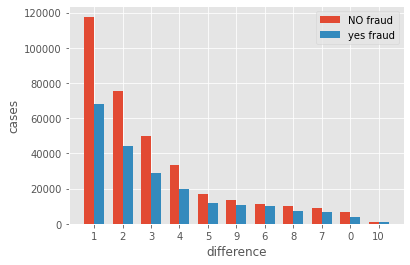

In [ ]:
barplotmake('difference','cases','difference')

 here for each patient we take total number of diagonosis code and total number of procedural code and take difference between them Here difference is represented by x axis y axis is number of patients
Here we can see that whose provider are doing the fraud their difference is higher than innocent provider.

# dedactable amount present

In [ ]:
fraud_provider_ip_df['DeductibleAmtPaid'] = fraud_provider_ip_df['DeductibleAmtPaid'].replace(np.nan, 0)


In [ ]:
def deductable(df):
    lst=[]
    for i in (df):
        if i==0:
            lst.append(0)
        else:
            lst.append(1)
    return(lst)

In [ ]:
mn2=deductable(fraud_provider_ip_df['DeductibleAmtPaid'])
fraud_provider_ip_df['isductable']=mn2


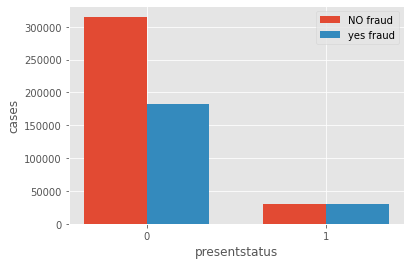

In [ ]:
barplotmake('isductable','cases','presentstatus')

 Here zero means DeductibleAmtPaid is not given by the beneficiary 1 means given.So who are victim of fraud there's number present less than other people.

# same or not

In [ ]:
fraud_provider_ip_df['DiagnosisGroupCode'] = fraud_provider_ip_df['DiagnosisGroupCode'].replace(np.nan, 0)
fraud_provider_ip_df['ClmAdmitDiagnosisCode'] = fraud_provider_ip_df['ClmAdmitDiagnosisCode'].replace(np.nan, 0)


In [ ]:
fraud_provider_ip_df['issamecode'] = np.where((fraud_provider_ip_df['DiagnosisGroupCode'] == fraud_provider_ip_df['ClmAdmitDiagnosisCode']), 1, 0)


In [ ]:
fraud_provider_ip_df['issamecode']

0         0
1         1
2         0
3         0
4         0
         ..
558206    1
558207    0
558208    1
558209    1
558210    1
Name: issamecode, Length: 558211, dtype: int64

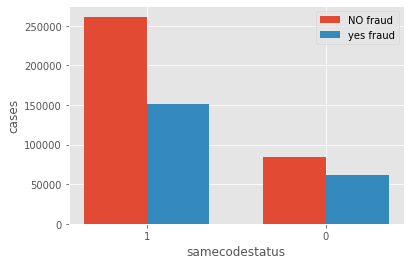

In [ ]:
barplotmake('issamecode','cases','samecodestatus')

Here Here one means 'DiagnosisGroupCode' and 'ClmAdmitDiagnosisCode' this two code same for a beneficiary zero  means not.So who are victim of fraud there number present less than other people

# Number of diseases

In [ ]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

fraud_provider_ip_df = fraud_provider_ip_df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
fraud_provider_ip_df=fraud_provider_ip_df.replace({'RenalDiseaseIndicator': 'Y'}, 1)
#in the RenalDiseaseIndicator some values are 0 and Y so we replace'Y' with 1.



In [ ]:
diseases=['ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease', 'ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

In [ ]:
fraud_provider_ip_df['suffering']=fraud_provider_ip_df[diseases].sum(axis = 1)


In [ ]:
fraud_provider_ip_df['suffering'].head()

0    7
1    4
2    5
3    2
4    6
Name: suffering, dtype: int64

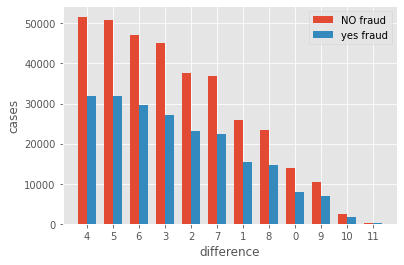

In [ ]:
barplotmake('suffering','cases','difference')

Here We take each patient and we calculate how many total number diseases he/she is suffering form.Here x axis represents the number of diseases.y axis is number of patient we can see that who are doing the fraud they suffer more number of diseases than innocent people .

# Data preprocessing

# claimtime

In [ ]:
fraud_provider_ip_df['ClaimEndDt'] = pd.to_datetime(fraud_provider_ip_df['ClaimEndDt'], format = '%Y-%m-%d')
fraud_provider_ip_df['ClaimStartDt'] = pd.to_datetime(fraud_provider_ip_df['ClaimStartDt'],format = '%Y-%m-%d',errors='ignore')

fraud_provider_ip_df['claimtime'] =(fraud_provider_ip_df['ClaimEndDt'] -fraud_provider_ip_df['ClaimStartDt']).dt.days
fraud_provider_ip_df.drop(['ClaimEndDt', 'ClaimStartDt'], axis=1, inplace=True)


In [ ]:
claimtimeno= fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'No')]
claimtimeyes= fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'Yes')]

pdf values of Surv_status =1 [8.76447172e-01 2.34558430e-02 1.29843811e-02 1.55667820e-02
 5.60195707e-03 4.76817741e-03 1.02659120e-02 3.54935368e-03
 4.60952767e-02 3.79253941e-04 1.41858344e-04 1.50543549e-04
 1.47648481e-04 6.07964333e-05 3.85044077e-04]
pdf values of Surv_status=2 [8.37699017e-01 4.05317769e-02 3.19742852e-02 1.19880073e-02
 7.72570913e-03 1.21101900e-02 5.54051768e-03 5.92586327e-03
 4.29942292e-02 7.00201132e-04 6.72005113e-04 4.74632982e-04
 2.96058197e-04 2.16169477e-04 1.15133743e-03]
interval [ 0.   2.4  4.8  7.2  9.6 12.  14.4 16.8 19.2 21.6 24.  26.4 28.8 31.2
 33.6 36. ]


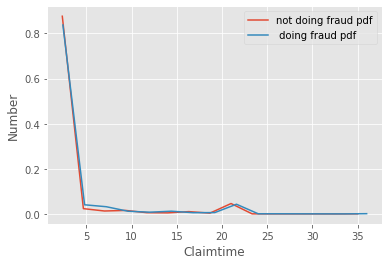

In [ ]:
#lst1=fraud_providerclaimyes['count1']
#lst2=fraud_providerclaimno['count1']
counts,bin_edges=np.histogram(claimtimeno['claimtime'],bins=15,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('pdf values of Surv_status =1',pdf)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],cdf)
###########################################

counts,bin_edges=np.histogram(claimtimeyes['claimtime'],bins=15,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('pdf values of Surv_status=2',pdf)
print('interval',bin_edges)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],cdf)
plt.legend(['not doing fraud pdf',' doing fraud pdf'])
plt.xlabel("Claimtime")
plt.ylabel('Number')
plt.show()

Here we can see for provider who are doing the fraud claim time is lower but number of cases is also lower than inocent cases.

# Age of the patient

In [ ]:
fraud_provider_ip_df['DOB'] = pd.to_datetime(fraud_provider_ip_df['DOB'], format = '%Y-%m-%d')
fraud_provider_ip_df['DOD'] = fraud_provider_ip_df['DOD'].fillna(datetime.today().strftime('%Y-%m-%d'))
fraud_provider_ip_df['Age'] = round((pd.to_datetime(fraud_provider_ip_df['DOD']) - pd.to_datetime(fraud_provider_ip_df['DOB'])).dt.days/365)
 

In [ ]:
ageno= fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'No')]
ageyes= fraud_provider_ip_df.loc[(fraud_provider_ip_df['PotentialFraud'] == 'Yes')]

pdf values of Surv_status =1 [0.00594937 0.00742875 0.01200006 0.01332889 0.0248889  0.02820086
 0.0375085  0.03947715 0.16420827 0.18341415 0.1647207  0.14452181
 0.10076285 0.0393903  0.03419944]
pdf values of Surv_status=2 [0.00578958 0.00678114 0.01192222 0.01334612 0.02435196 0.02751461
 0.03570556 0.03844527 0.16187804 0.18523374 0.16329254 0.14487114
 0.10331961 0.04212955 0.0354189 ]
interval [ 36.          41.06666667  46.13333333  51.2         56.26666667
  61.33333333  66.4         71.46666667  76.53333333  81.6
  86.66666667  91.73333333  96.8        101.86666667 106.93333333
 112.        ]


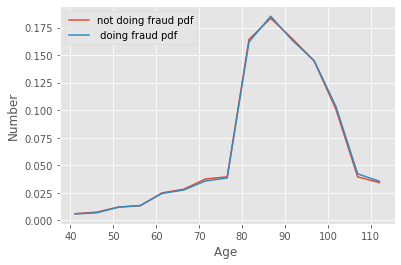

In [ ]:
#lst1=fraud_providerclaimyes['count1']
#lst2=fraud_providerclaimno['count1']
counts,bin_edges=np.histogram(ageno['Age'],bins=15,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('pdf values of Surv_status =1',pdf)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],cdf)
###########################################

counts,bin_edges=np.histogram(ageyes['Age'],bins=15,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('pdf values of Surv_status=2',pdf)
print('interval',bin_edges)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],cdf)
plt.legend(['not doing fraud pdf',' doing fraud pdf'])
plt.xlabel("Age ")
plt.ylabel('Number')
plt.show()

Here we can't see any difference between fraud and non fraud but between age 80 to 90 years's people are victim of fraud for 
for  most of the cases.

# Number of BeneID for provider

In [ ]:
Train_fno =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_fno = target.loc[(target['PotentialFraud'] == 'No')]
fraud_provider= pd.merge(merged_data, Train_fno, how='inner', on='Provider')
df2 = fraud_provider[['BeneID', 'ClaimID']].groupby(merged_data['Provider']).nunique().reset_index()

In [ ]:
df2.head()

,Provider,BeneID,ClaimID
0,PRV51001,17,17
1,PRV51003,100,105
2,PRV51004,77,77
3,PRV51005,587,708
4,PRV51007,33,35


In [ ]:
Train_fyes =  pd.DataFrame(columns = ['PotentialFraud', 'Provider'])
Train_fyes = target.loc[(target['PotentialFraud'] == 'Yes')]
fraud_provideryes = pd.merge(merged_data, Train_fyes, how='inner', on='Provider')
df3 = fraud_provideryes[['BeneID', 'ClaimID']].groupby(merged_data['Provider']).nunique().reset_index()

In [ ]:
df3.head()

,Provider,BeneID,ClaimID
0,PRV51001,13,13
1,PRV51003,76,82
2,PRV51004,43,43
3,PRV51005,302,395
4,PRV51007,26,26


pdf values of Surv_status =1 [9.38606848e-01 4.13223140e-02 1.02321921e-02 4.32900433e-03
 2.95159386e-03 9.83864620e-04 3.93545848e-04 3.93545848e-04
 0.00000000e+00 5.90318772e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.96772924e-04]
pdf values of Surv_status=2 [9.52840909e-01 3.14393939e-02 7.57575758e-03 3.97727273e-03
 2.46212121e-03 5.68181818e-04 3.78787879e-04 1.89393939e-04
 1.89393939e-04 1.89393939e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.89393939e-04]
interval [1.00000000e+00 2.54933333e+02 5.08866667e+02 7.62800000e+02
 1.01673333e+03 1.27066667e+03 1.52460000e+03 1.77853333e+03
 2.03246667e+03 2.28640000e+03 2.54033333e+03 2.79426667e+03
 3.04820000e+03 3.30213333e+03 3.55606667e+03 3.81000000e+03]


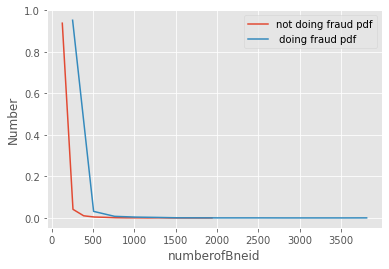

In [ ]:
#lst1=fraud_providerclaimyes['count1']
#lst2=fraud_providerclaimno['count1']
counts,bin_edges=np.histogram(df3['BeneID'],bins=15,density=True)
#print(bin_edges)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('pdf values of Surv_status =1',pdf)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],cdf)
###########################################

counts,bin_edges=np.histogram(df2['BeneID'],bins=15,density=True)
pdf=counts/sum(counts)
cdf=np.cumsum(pdf)
print('pdf values of Surv_status=2',pdf)
print('interval',bin_edges)
plt.plot(bin_edges[1:],pdf)
#plt.plot(bin_edges[1:],cdf)
plt.legend(['not doing fraud pdf',' doing fraud pdf'])
plt.xlabel("numberofBneid")
plt.ylabel('Number')
plt.show()

Here whose provider doing the fraud their number of beneid is 300 to 500 for most of the cases.

# Amount get

In [ ]:
fraud_provider_ip_df['moneygot']=fraud_provider_ip_df['InscClaimAmtReimbursed']-fraud_provider_ip_df['DeductibleAmtPaid']


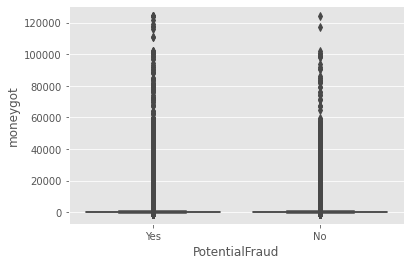

In [ ]:
sns.boxplot(x='PotentialFraud',y='moneygot',data=fraud_provider_ip_df)
plt.show()

So here we defined it here how much money, here money=(InscClaimAmtReimbursed money-deductibele) every person got from the provider ,but between two we can't see any difference

In [ ]:
fraud_provider_ip_df['moneygotIP']=fraud_provider_ip_df['IPAnnualReimbursementAmt']-fraud_provider_ip_df['IPAnnualDeductibleAmt']


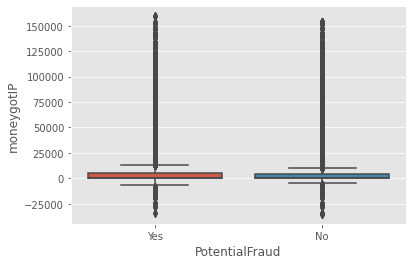

In [ ]:
sns.boxplot(x='PotentialFraud',y='moneygotIP',data=fraud_provider_ip_df)
plt.show()

So here we defined it here how much money, here money=(IPInscClaimAmtReimbursed money-IPdeductibele) every person got from the provider ,but between two we can't see any difference

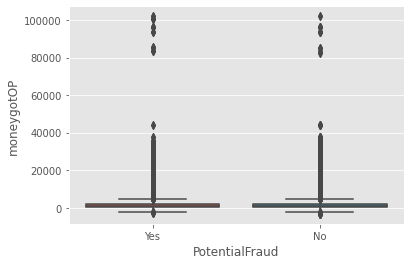

In [ ]:
fraud_provider_ip_df['moneygotOP']=fraud_provider_ip_df['OPAnnualReimbursementAmt']-fraud_provider_ip_df['OPAnnualDeductibleAmt']

sns.boxplot(x='PotentialFraud',y='moneygotOP',data=fraud_provider_ip_df)
plt.show()

So here we defined it here how much money, here money=(OPInscClaimAmtReimbursed money-OPdeductibele) every person got from the provider ,but between two we can't see any difference

In [ ]:
fraud_provider_ip_df.shape

(558211, 71)

# Feature Engineering

In [ ]:
fraud_provider_ip_df.isna().sum()[8:69]

ClmAdmitDiagnosisCode    0
DeductibleAmtPaid        0
DischargeDt              0
DiagnosisGroupCode       0
ClmDiagnosisCode_1       0
                        ..
issamecode               0
suffering                0
claimtime                0
Age                      0
moneygot                 0
Length: 61, dtype: int64

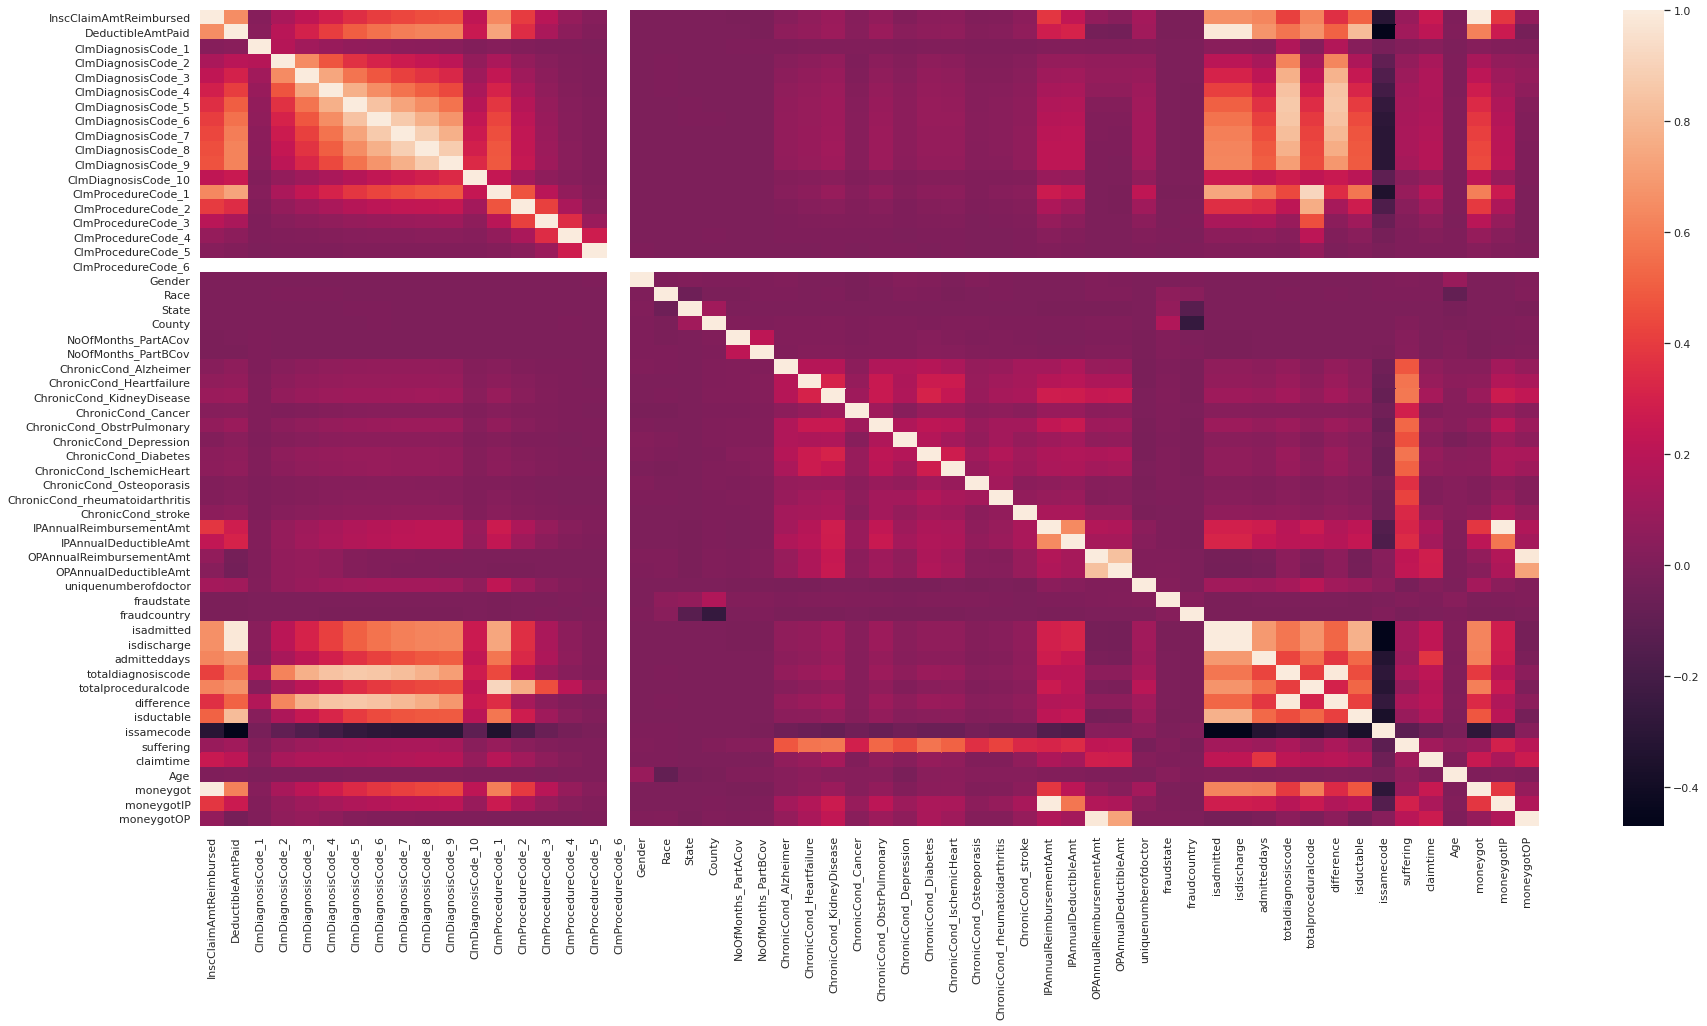

In [ ]:
#plot correlation heat map between features
sns.set(context='notebook', style='whitegrid')
plt.figure(figsize=(30, 15))
corr = fraud_provider_ip_df.corr()
sns.heatmap(corr, annot=False)

In [ ]:
fraud_provider_ip_df

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,numberofdoctor,uniquenumberofdoctor,fraudstate,fraudcountry,isadmitted,isdischarge,admitteddays,totaldiagnosiscode,totalproceduralcode,difference,isductable,issamecode,suffering,claimtime,Age,moneygot,moneygotIP,moneygotOP
0,BENE11001,CLM46614,PRV55912,26000,PHY390922,0,0,2009-04-12,7866,1068.0,2009-04-18,201,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1943-01-01,2021-05-19,1,1,0,39,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,Yes,[PHY390922],1,1,0,1,1,6,9,0,9,1,0,7,6,78.0,24932.0,32796,-10
1,BENE16973,CLM565430,PRV55912,50,PHY365867,PHY327147,0,1970-01-01,0,0.0,1970-01-01,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1932-05-01,2021-05-19,1,1,0,39,310,12,12,1,1,1,0,0,0,0,1,0,0,0,24000,2136,450,200,Yes,"[PHY365867, PHY327147]",2,1,0,0,0,0,9,0,9,0,1,4,0,89.0,50.0,21864,250
2,BENE17521,CLM34721,PRV55912,19000,PHY349293,PHY370861,PHY363291,2009-01-20,45340,1068.0,2009-02-01,987,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,1913-12-01,2021-05-19,2,1,0,39,230,12,12,1,1,1,0,1,0,0,1,0,0,0,19000,1068,100,20,Yes,"[PHY349293, PHY370861, PHY363291]",3,1,0,1,1,12,9,2,7,1,0,5,12,108.0,17932.0,17932,80
3,BENE21718,CLM72336,PRV55912,17000,PHY334706,PHY334706,0,2009-10-17,V5789,1068.0,2009-11-04,941,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1922-10-01,2021-05-19,1,1,0,39,600,12,12,0,0,0,0,0,0,0,1,1,0,0,17000,1068,1050,540,Yes,[PHY334706],1,1,0,1,1,18,9,1,8,1,0,2,18,99.0,15932.0,15932,510
4,BENE22934,CLM73394,PRV55912,13000,PHY390614,PHY323689,PHY363291,2009-10-25,71946,1068.0,2009-10-29,506,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1930-07-01,2021-05-19,2,1,0,39,280,12,12,0,1,0,0,1,0,1,1,1,1,0,27000,2136,450,160,Yes,"[PHY390614, PHY323689, PHY363291]",3,1,0,1,1,4,7,1,6,1,0,6,4,91.0,11932.0,24864,290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558206,BENE154147,CLM394122,PRV54050,500,PHY317497,0,PHY317497,1970-01-01,0,0.0,1970-01-01,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1925-01-01,2021-05-19,2,1,0,23,400,12,12,0,0,0,0,0,0,0,1,1,0,0,0,0,890,120,No,[PHY317497],1,1,1,0,0,0,3,0,3,0,1,2,2,96.0,500.0,0,770
558207,BENE154687,CLM184358,PRV54302,3300,PHY376238,PHY376238,0,1970-01-01,99639,0.0,1970-01-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1927-05-01,2021-05-19,1,2,0,25,150,12,12,1,0,1,0,0,0,1,1,0,1,0,0,0,4400,220,No,[PHY376238],1,0,1,0,0,0,1,0,1,0,0,5,0,94.0,3300.0,0,4180
558208,BENE157378,CLM460770,PRV51577,2100,PHY338096,0,0,1970-01-01,0,0.0,1970-01-01,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1946-06-01,2021-05-19,2,1,1,5,200,12,12,1,1,1,0,1,0,1,1,0,0,0,0,0,14240,2810,No,[PHY338096],1,1,1,0,0,0,2,0,2,0,1,6,20,75.0,2100.0,0,11430
558209,BENE158295,CLM306999,PRV53083,10,PHY416646,0,0,1970-01-01,0,0.0,1970-01-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1924-08-01,2021-05-19,2,1,0,16,490,12,12,0,1,1,1,1,1,1,1,1,1,0,0,0,640,350,No,[PHY416646],1,0,1,0,0,0,1,0,1,0,1,9,0,97.0,10.0,0,290


In [ ]:
fraud_provider_ip_df.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DOB',
       'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_Isch

In [ ]:
Train_Count = fraud_provider_ip_df[['BeneID', 'ClaimID']].groupby(fraud_provider_ip_df['Provider']).nunique().reset_index()

In [ ]:
Train_sum=fraud_provider_ip_df.groupby(['Provider'], as_index = False)[['ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'fraudstate', 'fraudcountry','isductable', 'issamecode','isadmitted', 'isdischarge']].sum()


In [ ]:
Train_sum.head()

,Provider,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,fraudstate,fraudcountry,isductable,issamecode,isadmitted,isdischarge
0,PRV51001,24,16,10,8,8,8,3,2,1,0,2,1,0,0,0,0,0,9,5,14,5,5
1,PRV51003,132,112,92,78,66,58,55,50,45,5,39,9,0,0,0,0,23,27,63,54,62,62
2,PRV51004,143,91,56,34,24,16,9,8,4,0,0,0,0,0,0,0,53,67,7,121,0,0
3,PRV51005,1149,723,455,287,164,100,68,43,26,1,0,0,0,0,0,0,2,506,48,913,0,0
4,PRV51007,72,46,29,21,14,12,9,6,5,1,1,0,0,0,0,0,0,2,5,55,3,3


In [ ]:
Train_Count.head()

,Provider,BeneID,ClaimID
0,PRV51001,24,25
1,PRV51003,117,132
2,PRV51004,138,149
3,PRV51005,495,1165
4,PRV51007,58,72


In [ ]:
#https://www.kaggle.com/rahuly93/medicare-provider-fraud-detection
Train_Data_mean = fraud_provider_ip_df.groupby(['Provider'], as_index = False)[['InscClaimAmtReimbursed', 'DeductibleAmtPaid','admitteddays',
                                                    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure','ChronicCond_Cancer', 
                                                    'ChronicCond_KidneyDisease', 'ChronicCond_ObstrPulmonary',
                                                   'ChronicCond_Depression','ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',   
                                                    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                                                    'ChronicCond_stroke', 'IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                                                    'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt','suffering','Age','moneygot','moneygotIP','moneygotOP',
                                                    'claimtime','totaldiagnosiscode','totalproceduralcode','difference','uniquenumberofdoctor','NoOfMonths_PartACov', 'NoOfMonths_PartBCov']].mean()



In [ ]:
Train_Data_mean.head()

,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,admitteddays,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_Cancer,ChronicCond_KidneyDisease,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,suffering,Age,moneygot,moneygotIP,moneygotOP,claimtime,totaldiagnosiscode,totalproceduralcode,difference,uniquenumberofdoctor,NoOfMonths_PartACov,NoOfMonths_PartBCov
0,PRV51001,4185.600000,213.600000,1.000000,0.600000,0.760000,0.200000,0.680000,0.400000,0.360000,0.840000,0.920000,0.240000,0.320000,0.240000,17606.000000,897.120000,2615.200000,463.920000,5.560000,90.280000,3972.000000,16708.880000,2151.280000,1.440000,3.200000,0.120000,3.080000,1.280000,12.000000,12.000000
1,PRV51003,4588.409091,502.166667,2.424242,0.424242,0.606061,0.075758,0.484848,0.310606,0.409091,0.757576,0.848485,0.250000,0.287879,0.090909,7568.181818,931.424242,2678.181818,737.121212,4.545455,81.462121,4086.242424,6636.757576,1941.060606,3.674242,5.250000,0.363636,4.886364,1.181818,11.818182,11.871212
2,PRV51004,350.134228,2.080537,0.000000,0.429530,0.590604,0.107383,0.335570,0.275168,0.422819,0.704698,0.724832,0.328859,0.308725,0.114094,4351.879195,434.953020,2194.899329,622.751678,4.342282,83.731544,348.053691,3916.926174,1572.147651,1.429530,2.583893,0.000000,2.583893,1.322148,11.865772,11.959732
3,PRV51005,241.124464,3.175966,0.000000,0.365665,0.583691,0.141631,0.435193,0.253219,0.416309,0.685837,0.768240,0.295279,0.284120,0.106438,3623.991416,379.162232,2109.733906,636.328755,4.335622,81.955365,237.948498,3244.829185,1473.405150,1.088412,2.588841,0.000000,2.588841,1.209442,11.907296,11.939914
4,PRV51007,468.194444,45.333333,0.222222,0.361111,0.555556,0.166667,0.305556,0.222222,0.402778,0.680556,0.708333,0.291667,0.305556,0.166667,3050.000000,445.000000,1729.722222,469.722222,4.166667,80.611111,422.861111,2605.000000,1260.000000,0.958333,2.986111,0.013889,2.972222,1.125000,11.833333,11.833333


In [ ]:
#
Train_df=pd.merge(Train_Count,Train_Data_mean,on='Provider',how='left').\
                merge(Train_sum,on='Provider',how='left').\
                 merge(target,on='Provider',how='left')

In [ ]:
Train_df.shape

(5410, 56)

In [ ]:
Train_df.to_csv('drive/MyDrive/self/Train_df.csv')